In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('research').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/07 01:53:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Let's read in the data.
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv')
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv')

## 2.2 Dataset Information

In [3]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

+-----------+----+---------------------------------------+---------------------------------+----------------------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------+--------------------------------------------------+-----------------------------------------------------------+---------------------------------+----------------------------------------+-----------+--------------+--------------+--------------+--------+---------+
|     Entity|Year|Access to electricity (% of population)|Access to clean fuels for cooking|Renewable-electricity-generating-capacity-per-capita|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [4]:
num_rows = df.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3649
Number of columns: 21


In [5]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Access to electricity (% of population): string (nullable = true)
 |-- Access to clean fuels for cooking: string (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: string (nullable = true)
 |-- Financial flows to developing countries (US $): string (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): string (nullable = true)
 |-- Electricity from fossil fuels (TWh): string (nullable = true)
 |-- Electricity from nuclear (TWh): string (nullable = true)
 |-- Electricity from renewables (TWh): string (nullable = true)
 |-- Low-carbon electricity (% electricity): string (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): string (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): string (nullable = true)
 |-- Value_co2_emissions_kt_by_country: string (nullable = true)
 |-- Renewables (% equiva

## Data Manipulation

In [6]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)

In [7]:
# Then create a variable with the correct structure.
data_schema = [StructField('Entity',StringType(),True),
              StructField('Year',IntegerType(),True),
               StructField('Access to electricity (% of population)',FloatType(),True),
               StructField('Access to clean fuels for cooking',FloatType(),True),
               StructField('Renewable-electricity-generating-capacity-per-capita',FloatType(),True),
               StructField('Financial flows to developing countries (US $)',IntegerType(),True),
               StructField('Renewable energy share in the total final energy consumption (%)',FloatType(),True),
               StructField('Electricity from fossil fuels (TWh)',FloatType(),True),
               StructField('Electricity from nuclear (TWh)',FloatType(),True),
               StructField('Electricity from renewables (TWh)',FloatType(),True),
               StructField('Low-carbon electricity (% electricity)',FloatType(),True),
               StructField('Primary energy consumption per capita (kWh/person)',FloatType(),True),
               StructField('Energy intensity level of primary energy (MJ/$2017 PPP GDP)',FloatType(),True),
               StructField('Value_co2_emissions_kt_by_country',FloatType(),True),
               StructField('Renewables (% equivalent primary energy)',FloatType(),True),
               StructField('gdp_growth',FloatType(),True),
               StructField('gdp_per_capita',FloatType(),True),
               StructField('Density(P/Km2)',IntegerType(),True),
               StructField('Land Area(Km2)',IntegerType(),True),
               StructField('Latitude',FloatType(),True),
               StructField('Longitude',FloatType(),True),
              ]

final_struct = StructType(fields=data_schema)

In [8]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.option("header", "true").csv('Datasets/global-data-on-sustainable-energy.csv', schema=final_struct)
df.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Access to electricity (% of population): float (nullable = true)
 |-- Access to clean fuels for cooking: float (nullable = true)
 |-- Renewable-electricity-generating-capacity-per-capita: float (nullable = true)
 |-- Financial flows to developing countries (US $): integer (nullable = true)
 |-- Renewable energy share in the total final energy consumption (%): float (nullable = true)
 |-- Electricity from fossil fuels (TWh): float (nullable = true)
 |-- Electricity from nuclear (TWh): float (nullable = true)
 |-- Electricity from renewables (TWh): float (nullable = true)
 |-- Low-carbon electricity (% electricity): float (nullable = true)
 |-- Primary energy consumption per capita (kWh/person): float (nullable = true)
 |-- Energy intensity level of primary energy (MJ/$2017 PPP GDP): float (nullable = true)
 |-- Value_co2_emissions_kt_by_country: float (nullable = true)
 |-- Renewables (% equivalent prim

In [9]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
# df.describe().show()

stats_df = df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

from IPython.display import display

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Entity,3649,None,None,Afghanistan,Zimbabwe
Year,3649,2010.0383666758016,6.054228365650764,2000,2020
Access to electricity (% of population),3639,78.93370218462393,30.27554143208654,1.2522693,100.0
Access to clean fuels for cooking,3480,63.25528734745993,39.04365758993957,0.0,100.0
Renewable-electricity-generating-capacity-per-capita,2718,113.13749808244985,244.16725470613554,0.0,3060.19
Financial flows to developing countries (US $),1555,8.284976205787781E7,2.135290375742725E8,0,2112780000
Renewable energy share in the total final energy consumption (%),3455,32.6381649511784,29.894901331793534,0.0,96.04
Electricity from fossil fuels (TWh),3628,70.3650024256478,348.0518635136442,0.0,5184.13
Electricity from nuclear (TWh),3523,13.450190180841238,73.00662308995312,0.0,809.41


In [10]:
# Count unique values for a specific column
column_name = "Entity"
unique_count = df.select(column_name).distinct().count()
print(f"Number of unique countries in dataset '{column_name}': {unique_count}")

Number of unique countries in dataset 'Entity': 176


In [11]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df2.show()

# You could also try this. 
df2.columns

+-----------+----+----+--------------------+
|     Entity|Code|Year|Annual CO₂ emissions|
+-----------+----+----+--------------------+
|Afghanistan| AFG|1949|               14656|
|Afghanistan| AFG|1950|               84272|
|Afghanistan| AFG|1951|               91600|
|Afghanistan| AFG|1952|               91600|
|Afghanistan| AFG|1953|              106256|
|Afghanistan| AFG|1954|              106256|
|Afghanistan| AFG|1955|              153888|
|Afghanistan| AFG|1956|              183200|
|Afghanistan| AFG|1957|              293120|
|Afghanistan| AFG|1958|              329760|
|Afghanistan| AFG|1959|              384571|
|Afghanistan| AFG|1960|              413885|
|Afghanistan| AFG|1961|              490798|
|Afghanistan| AFG|1962|              688594|
|Afghanistan| AFG|1963|              706736|
|Afghanistan| AFG|1964|              838551|
|Afghanistan| AFG|1965|             1006917|
|Afghanistan| AFG|1966|             1091159|
|Afghanistan| AFG|1967|             1281865|
|Afghanist

['Entity', 'Code', 'Year', 'Annual CO₂ emissions']

In [12]:
num_rows = df2.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df2.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 30308
Number of columns: 4


In [13]:
# For type, we can use print schema. 
# But wait! What if you want to change the format of the data? Maybe change age to an integer instead of long?
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Annual CO₂ emissions: string (nullable = true)



In [14]:
# Then create a variable with the correct structure.
data2_schema = [StructField('Entity',StringType(),True),
               StructField('Code',StringType(),True),
                StructField('Year',IntegerType(),True),
               StructField('Annual CO₂ emissions',FloatType(),True)
              ]

final2_struct = StructType(fields=data2_schema)

In [15]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df2 = spark.read.option("header", "true").csv('Datasets/annual-co2-emissions-per-country.csv', schema=final2_struct)
df2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Annual CO₂ emissions: float (nullable = true)



In [16]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
# But what about data type?
df2.describe().show()

+-------+-----------+-----+------------------+--------------------+
|summary|     Entity| Code|              Year|Annual CO₂ emissions|
+-------+-----------+-----+------------------+--------------------+
|  count|      30308|24157|             30308|               30308|
|   mean|       null| null|1940.1913356209582|3.9127215594534516E8|
| stddev|       null| null| 65.51023156216606|1.8558246627678738E9|
|    min|Afghanistan|  ABW|              1750|                 0.0|
|    max|   Zimbabwe|  ZWE|              2022|        3.7149786E10|
+-------+-----------+-----+------------------+--------------------+



## 2.3 Data Exploration

In [17]:
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Group by country and calculate the mean CO2 emissions
mean_co2_df = df.groupBy("Entity").agg(avg(col("Value_co2_emissions_kt_by_country")).alias("Mean_CO2_Emissions"))

# Convert to Pandas DataFrame for plotting
mean_co2_pd = mean_co2_df.toPandas()


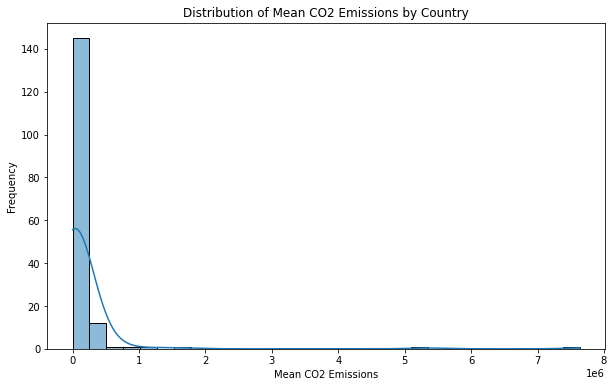

In [19]:
# Plot the distribution of mean CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(mean_co2_pd["Mean_CO2_Emissions"], bins=30, kde=True)
plt.title("Distribution of Mean CO2 Emissions by Country")
plt.xlabel("Mean CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

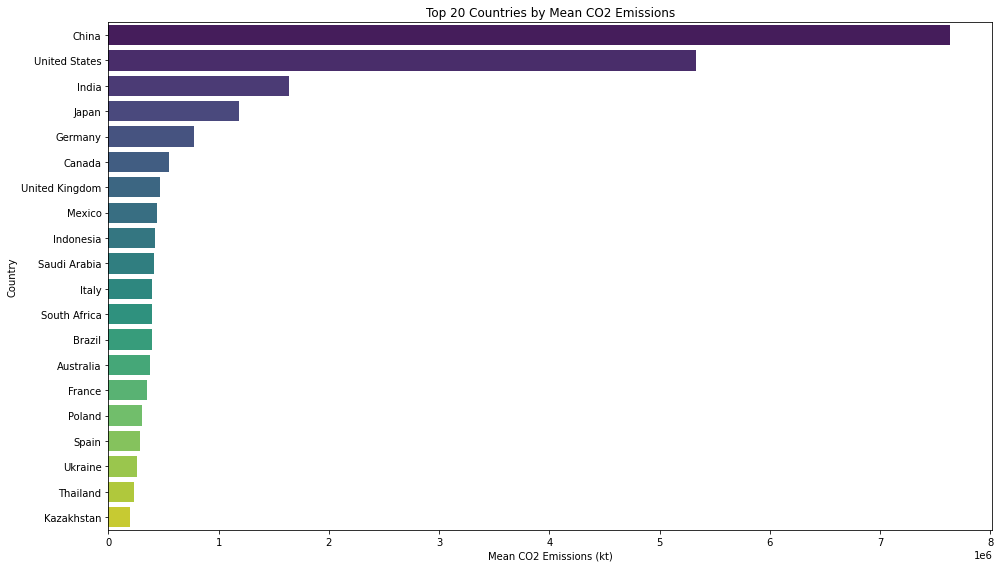

In [20]:
mean_co2_pd_sorted = mean_co2_pd.sort_values(by="Mean_CO2_Emissions", ascending=False)

# Select only the top 20 countries
top_20_countries = mean_co2_pd_sorted.head(20)

# Plot the distribution of the top 20 countries
plt.figure(figsize=(14, 8))
sns.barplot(x="Mean_CO2_Emissions", y="Entity", data=top_20_countries, palette="viridis")
plt.title("Top 20 Countries by Mean CO2 Emissions")
plt.xlabel("Mean CO2 Emissions (kt)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [21]:
# Compute correlations for all columns of interest
correlations = []
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Density(P/Km2)",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "gdp_growth",
    "Renewables (% equivalent primary energy)",
    "gdp_per_capita",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"
]

for column in columns_of_interest:
    correlation = df.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

from pyspark.sql.functions import abs

# Apply the abs() function to the Correlation column to create Absolute Correlation column
correlation_df = correlation_df.withColumn("Absolute Correlation", abs(col("Correlation")))

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+----------------------------------------------------------------+--------------------+--------------------+
|Column                                                          |Correlation         |Absolute Correlation|
+----------------------------------------------------------------+--------------------+--------------------+
|Electricity from fossil fuels (TWh)                             |0.9481763559733735  |0.9481763559733735  |
|Electricity from renewables (TWh)                               |0.7854913009453646  |0.7854913009453646  |
|Land Area(Km2)                                                  |0.6341015263961219  |0.6341015263961219  |
|Electricity from nuclear (TWh)                                  |0.5830326881392291  |0.5830326881392291  |
|Financial flows to developing countries (US $)                  |0.1440719377265664  |0.1440719377265664  |
|Access to electricity (% of population)                         |0.1160704499100412  |0.1160704499100412  |
|Latitude          

# 3. Data Exploration

## 3.1 Data Selection

In [22]:
columns_to_drop = [
    "Access to clean fuels for cooking",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Renewables (% equivalent primary energy)",
    "Low-carbon electricity (% electricity)",
    "Energy intensity level of primary energy",
    "Renewable-electricity-generating-capacity-per-capita",
    "Longitude",
    "Latitude"
]

df_new1 = df.drop(*columns_to_drop)
df_new1.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Entity     |Year|Access to electricity (% of population)|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Primary energy consumption per capita (kWh/person)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+----

In [23]:
num_columns = len(df_new1.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 14


In [24]:
# Rename columns
df_new2 = df_new1.withColumnRenamed("Entity", "Country")

# Show the DataFrame with renamed columns
df_new2.show(truncate=False)


+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+--------------------------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Country    |Year|Access to electricity (% of population)|Financial flows to developing countries (US $)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Primary energy consumption per capita (kWh/person)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------+----------------------------------------------------------------+----

In [25]:
# Rename columns
df2_new = df2.withColumnRenamed("Entity", "Country")

# Show the DataFrame with renamed columns
df2_new.show(truncate=False)

+-----------+----+----+--------------------+
|Country    |Code|Year|Annual CO₂ emissions|
+-----------+----+----+--------------------+
|Afghanistan|AFG |1949|14656.0             |
|Afghanistan|AFG |1950|84272.0             |
|Afghanistan|AFG |1951|91600.0             |
|Afghanistan|AFG |1952|91600.0             |
|Afghanistan|AFG |1953|106256.0            |
|Afghanistan|AFG |1954|106256.0            |
|Afghanistan|AFG |1955|153888.0            |
|Afghanistan|AFG |1956|183200.0            |
|Afghanistan|AFG |1957|293120.0            |
|Afghanistan|AFG |1958|329760.0            |
|Afghanistan|AFG |1959|384571.0            |
|Afghanistan|AFG |1960|413885.0            |
|Afghanistan|AFG |1961|490798.0            |
|Afghanistan|AFG |1962|688594.0            |
|Afghanistan|AFG |1963|706736.0            |
|Afghanistan|AFG |1964|838551.0            |
|Afghanistan|AFG |1965|1006917.0           |
|Afghanistan|AFG |1966|1091159.0           |
|Afghanistan|AFG |1967|1281865.0           |
|Afghanist

## 3.2	Data Cleaning

In [26]:
missing_data_columns_to_drop = [
    "Financial flows to developing countries (US $)",
    "Primary energy consumption per capita (kWh/person)"
]

df_new3 = df_new2.drop(*missing_data_columns_to_drop)
df_new3.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Country    |Year|Access to electricity (% of population)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|
+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+
|Afghanistan|2000|1.613591                             

In [27]:
num_rows = df_new3.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df_new3.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 3649
Number of columns: 12


## 3.3 Construct New Attribute

In [28]:
# Construct the new attribute
df_new4 = df_new3.withColumn("Annual_gdp", col("Density(P/Km2)") * col("Land Area(Km2)") * col("gdp_per_capita"))

# Show the DataFrame with the new column
df_new4.show(truncate=False)

+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+-------------+
|Country    |Year|Access to electricity (% of population)|Renewable energy share in the total final energy consumption (%)|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_growth|gdp_per_capita|Density(P/Km2)|Land Area(Km2)|Annual_gdp   |
+-----------+----+---------------------------------------+----------------------------------------------------------------+-----------------------------------+------------------------------+---------------------------------+---------------------------------+----------+--------------+--------------+--------------+-------------+
|Afghanistan|

In [29]:
correlation = df_new4.corr("Value_co2_emissions_kt_by_country", "Annual_gdp")
print("Correlation between Value_co2_emissions_kt_by_country and Annual_gdp:", correlation)

Correlation between Value_co2_emissions_kt_by_country and Annual_gdp: 0.7744424692868098


## 3.4	Integrating Data

In [35]:
from pyspark.sql.functions import when,round
joined_df = df_new4.join(df2_new, ['Country', 'Year'], 'left')

# Define conversion factor from tonne to kilotonne
conversion_factor = 1000

# Fill missing CO2 emission values in database 1 from database 2
filled_df = joined_df.withColumn("Value_co2_emissions_kt_by_country", 
                                  when(joined_df["Value_co2_emissions_kt_by_country"].isNull(), 
                                       joined_df["Annual CO₂ emissions"] / conversion_factor)
                                 .otherwise(joined_df["Value_co2_emissions_kt_by_country"])
                                  )

# Round the CO2 emissions to two decimal places
updated_df = filled_df.withColumn("Value_co2_emissions_kt_by_country", round(filled_df["Value_co2_emissions_kt_by_country"], 2))

# Drop unnecessary columns
final_df = updated_df.drop("Annual CO₂ emissions", "Code")

In [36]:
stats_df = final_df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,3649,None,None,Afghanistan,Zimbabwe
Year,3649,2010.0383666758016,6.054228365650764,2000,2020
Access to electricity (% of population),3639,78.93370218462393,30.27554143208654,1.2522693,100.0
Renewable energy share in the total final energy consumption (%),3455,32.6381649511784,29.894901331793534,0.0,96.04
Electricity from fossil fuels (TWh),3628,70.3650024256478,348.0518635136442,0.0,5184.13
Electricity from nuclear (TWh),3523,13.450190180841238,73.00662308995312,0.0,809.41
Electricity from renewables (TWh),3628,23.968009911430844,104.43108457776746,0.0,2184.94
Value_co2_emissions_kt_by_country,3623,153768.9274689484,757568.413582635,10.0,1.091401216E7
gdp_growth,3332,3.441610053690284,5.686720163271315,-62.07592,123.13956


In [37]:
# Drop rows with missing CO2 emissions values
df_new = final_df.dropna(subset=["Value_co2_emissions_kt_by_country"])

stats_df = df_new.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,3623,None,None,Afghanistan,Zimbabwe
Year,3623,2010.0320176649186,6.049453063861042,2000,2020
Access to electricity (% of population),3614,78.78797516597855,30.32917442403671,1.2522693,100.0
Renewable energy share in the total final energy consumption (%),3431,32.853730663397144,29.88505010519653,0.0,96.04
Electricity from fossil fuels (TWh),3602,70.75108517497428,349.2756254494901,0.0,5184.13
Electricity from nuclear (TWh),3497,13.550191594825188,73.26834877265463,0.0,809.41
Electricity from renewables (TWh),3602,24.13967239275432,104.7877895388557,0.0,2184.94
Value_co2_emissions_kt_by_country,3623,153768.9274689484,757568.413582635,10.0,1.091401216E7
gdp_growth,3307,3.4672014741488235,5.693162289300852,-62.07592,123.13956


# 4.	Data Transformation

## 4.1	Data Reduction

In [64]:
untargeted_data_columns_to_drop = [
    "Access to electricity (% of population)",
    "Renewable energy share in the total final energy consumption (%)",
    "gdp_growth",
    "Density(P/Km2)",
    "Land Area(Km2)"
]

df_new = df_new.drop(*untargeted_data_columns_to_drop)
df_new.show(truncate=False)

+-----------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+
|Country    |Year|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_per_capita|Annual_gdp   |
+-----------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+
|Afghanistan|2000|0.16                               |0.0                           |0.31                             |760.0                            |null          |null         |
|Afghanistan|2001|0.09                               |0.0                           |0.5                              |730.0                            |null          |null         |
|Afghanistan|2002|0.13                               |0.0                           |

In [65]:
# Drop rows with missing CO2 emissions values
df_new = final_df.dropna(subset=["Value_co2_emissions_kt_by_country", "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "gdp_per_capita",
    "Annual_gdp",])

stats_df = df_new.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,231,None,None,Brazil,United States
Year,231,2010.0,6.0684501280410865,2000,2020
Electricity from fossil fuels (TWh),231,801.4942375282188,1144.2021564986949,28.87,5184.13
Electricity from nuclear (TWh),231,166.98597409611656,233.62097612589952,0.0,809.41
Electricity from renewables (TWh),231,259.40558413458075,328.6575624987284,1.19,2184.94
Value_co2_emissions_kt_by_country,231,1750145.508095238,2488502.9479747354,281539.04,1.091401216E7
gdp_per_capita,231,27319.494548450817,18339.79281703934,443.3142,65279.527
Annual_gdp,231,4.2643821856847793E12,4.984140259526374E12,1.67085162E11,2.31093861E13
Group,231,None,None,BRICS,G7


In [67]:
# Select G7 countries & BRICS countries
from pyspark.sql.functions import when, col

# Define lists of G7 and BRICS countries
g7_countries = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]
brics_countries = ["Brazil", "Russia", "India", "China", "South Africa"]

# Add a new column to label the countries
df1_labeled = df_new.withColumn(
    "Group",
    when(col("Country").isin(g7_countries), "G7")
    .when(col("Country").isin(brics_countries), "BRICS")
    .otherwise("Other")
)

# Filter out rows that are not in G7 or BRICS
df1_filtered = df1_labeled.filter(col("Group") != "Other")

# Show the result
df1_filtered.show(truncate=False)

+-------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+-----+
|Country|Year|Electricity from fossil fuels (TWh)|Electricity from nuclear (TWh)|Electricity from renewables (TWh)|Value_co2_emissions_kt_by_country|gdp_per_capita|Annual_gdp   |Group|
+-------+----+-----------------------------------+------------------------------+---------------------------------+---------------------------------+--------------+-------------+-----+
|Brazil |2000|28.87                              |4.94                          |308.77                           |313670.0                         |3749.911      |7.9833452E11 |BRICS|
|Brazil |2001|35.19                              |14.27                         |273.71                           |319380.0                         |3160.2493     |6.7279893E11 |BRICS|
|Brazil |2002|33.5                               |13.84                    

In [68]:
# Count unique values for a specific column
column_name = "Country"
unique_values = df1_filtered.select(column_name).distinct().collect()
print(f"Number of unique countries in dataset '{column_name}': {len(unique_values)}")
# Print all unique values
for value in unique_values:
    print(value[column_name])

Number of unique countries in dataset 'Country': 11
Germany
France
China
India
United States
Italy
Canada
Brazil
Japan
South Africa
United Kingdom


In [69]:
num_rows = df1_filtered.count()
print(f"Number of rows: {num_rows}")

num_columns = len(df1_filtered.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 231
Number of columns: 9


In [70]:
df1_filtered.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Electricity from fossil fuels (TWh): float (nullable = true)
 |-- Electricity from nuclear (TWh): float (nullable = true)
 |-- Electricity from renewables (TWh): float (nullable = true)
 |-- Value_co2_emissions_kt_by_country: double (nullable = true)
 |-- gdp_per_capita: float (nullable = true)
 |-- Annual_gdp: float (nullable = true)
 |-- Group: string (nullable = false)



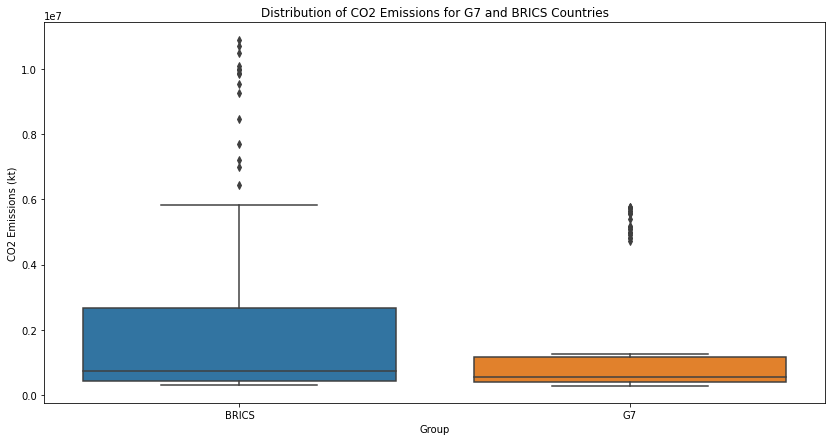

In [71]:
# Convert the filtered DataFrame to a Pandas DataFrame
df1_filtered_pd = df1_filtered.toPandas()

# Plot the distribution of CO2 emissions for G7 and BRICS groups
plt.figure(figsize=(14, 7))

# Create a boxplot to show the distribution of CO2 emissions
sns.boxplot(x="Group", y="Value_co2_emissions_kt_by_country", data=df1_filtered_pd)
plt.title('Distribution of CO2 Emissions for G7 and BRICS Countries')
plt.xlabel('Group')
plt.ylabel('CO2 Emissions (kt)')

# Display the plot
plt.show()

In [72]:
# Step 1: Filter df2_new for "World" and years 2000 to 2020
filtered_df2 = df2_new.filter((col("Country") == "World") & (col("Year").between(2000, 2020)))

# Drop unnecessary columns
filtered_df2 = filtered_df2.drop("Code")

from pyspark.sql.functions import lit
# Step 2: Create new columns with null values to match the schema of df1_filtered
new_rows_df = filtered_df2.select("Country", "Year") \
    .withColumn("Electricity from fossil fuels (TWh)", lit(None).cast("float")) \
    .withColumn("Electricity from nuclear (TWh)", lit(None).cast("float")) \
    .withColumn("Electricity from renewables (TWh)", lit(None).cast("float")) \
    .withColumn("Value_co2_emissions_kt_by_country", lit(None).cast("double")) \
    .withColumn("gdp_per_capita", lit(None).cast("float")) \
    .withColumn("Annual_gdp", lit(None).cast("float")) \
    .withColumn("Group", lit("World"))

# Step 3: Union the DataFrames
joined_df = df1_filtered.union(new_rows_df)

final_df = joined_df.join(filtered_df2, ['Country', 'Year'], 'left')
# Define conversion factor from tonne to kilotonne
conversion_factor = 1000

# Fill missing CO2 emission values in database 1 from database 2
final_df = final_df.withColumn("Value_co2_emissions_kt_by_country", 
                                  when(final_df["Value_co2_emissions_kt_by_country"].isNull(), 
                                       final_df["Annual CO₂ emissions"] / conversion_factor)
                                 .otherwise(joined_df["Value_co2_emissions_kt_by_country"])
                                  )

# Drop unnecessary columns
final_df = final_df.drop("Annual CO₂ emissions")

In [73]:
num_rows = final_df.count()
print(f"Number of rows: {num_rows}")

num_columns = len(final_df.columns)
print(f"Number of columns: {num_columns}")

Number of rows: 252
Number of columns: 9


In [74]:
stats_df = final_df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,252,None,None,Brazil,World
Year,252,2010.0,6.067351069781952,2000,2020
Electricity from fossil fuels (TWh),231,801.4942375282188,1144.2021564986949,28.87,5184.13
Electricity from nuclear (TWh),231,166.98597409611656,233.62097612589952,0.0,809.41
Electricity from renewables (TWh),231,259.40558413458075,328.6575624987284,1.19,2184.94
Value_co2_emissions_kt_by_country,252,4295040.183690476,8851447.63720673,281539.04,3.7040103424E7
gdp_per_capita,231,27319.494548450817,18339.79281703934,443.3142,65279.527
Annual_gdp,231,4.2643821856847793E12,4.984140259526374E12,1.67085162E11,2.31093861E13
Group,252,None,None,BRICS,World


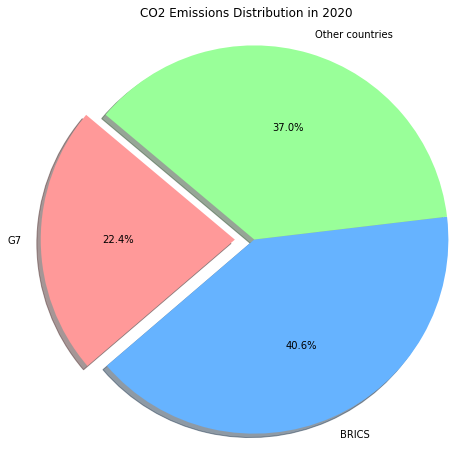

In [75]:
from pyspark.sql.functions import sum as spark_sum, col, lit
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Sum the CO2 emissions of BRICS and G7 countries for the year 2020
brics_g7_sum_2020_df = final_df.filter((col("Year") == 2020) & ((col("Group") == "BRICS") | (col("Group") == "G7"))) \
    .groupBy("Group") \
    .agg(spark_sum("Value_co2_emissions_kt_by_country").alias("CO2_emissions_sum"))

# Step 2: Sum the CO2 emissions of the world group for the year 2020
world_sum_2020_df = final_df.filter((col("Year") == 2020) & (col("Group") == "World")) \
    .agg(spark_sum("Value_co2_emissions_kt_by_country").alias("World_CO2_emissions_sum"))

# Step 3: Convert to Pandas DataFrames for calculations
brics_g7_sum_2020_pd = brics_g7_sum_2020_df.toPandas()
world_sum_2020_pd = world_sum_2020_df.toPandas()

# Step 4: Calculate the percentages
world_total_2020 = world_sum_2020_pd.at[0, "World_CO2_emissions_sum"]
brics_total_2020 = brics_g7_sum_2020_pd[brics_g7_sum_2020_pd["Group"] == "BRICS"]["CO2_emissions_sum"].sum()
g7_total_2020 = brics_g7_sum_2020_pd[brics_g7_sum_2020_pd["Group"] == "G7"]["CO2_emissions_sum"].sum()
other_total_2020 = world_total_2020 - (brics_total_2020 + g7_total_2020)

# Step 5: Create a pie chart
labels = ["G7", "BRICS", "Other countries"]
sizes = [g7_total_2020, brics_total_2020, other_total_2020]
colors = ["#ff9999","#66b3ff","#99ff99"]
explode = (0.1, 0, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title("CO2 Emissions Distribution in 2020")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


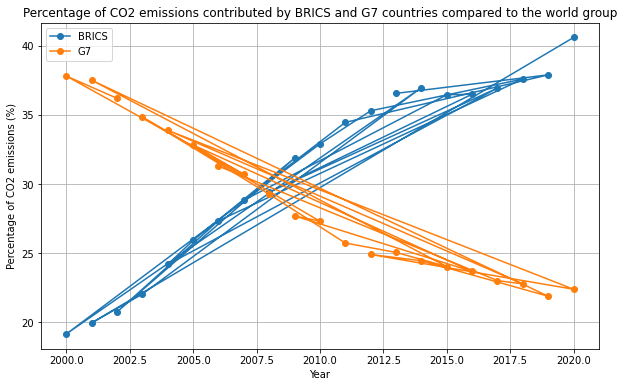

In [76]:
from pyspark.sql.functions import sum as spark_sum, when
# Step 1: Sum the CO2 emissions of BRICS and G7 countries annually
brics_g7_sum_df = final_df.filter((col("Group") == "BRICS") | (col("Group") == "G7")) \
    .groupBy("Year", "Group") \
    .agg(spark_sum("Value_co2_emissions_kt_by_country").alias("CO2_emissions_sum"))

# Step 2: Sum the CO2 emissions of the world group annually
world_sum_df = final_df.filter(col("Group") == "World") \
    .groupBy("Year") \
    .agg(spark_sum("Value_co2_emissions_kt_by_country").alias("World_CO2_emissions_sum"))

# Step 3: Calculate the percentage of CO2 emissions contributed by BRICS and G7 countries compared to the CO2 emissions of the world group
percentage_df = brics_g7_sum_df.join(world_sum_df, "Year", "inner") \
    .withColumn("BRICS_percentage", (col("CO2_emissions_sum") / col("World_CO2_emissions_sum")) * 100) \
    .withColumn("G7_percentage", (col("CO2_emissions_sum") / col("World_CO2_emissions_sum")) * 100) \
    .select("Year", "Group", "BRICS_percentage", "G7_percentage")

# Step 4: Plot the results
brics_percentage_pd = percentage_df.filter(col("Group") == "BRICS").toPandas()
g7_percentage_pd = percentage_df.filter(col("Group") == "G7").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(brics_percentage_pd["Year"], brics_percentage_pd["BRICS_percentage"], label="BRICS", marker='o')
plt.plot(g7_percentage_pd["Year"], g7_percentage_pd["G7_percentage"], label="G7", marker='o')
plt.xlabel("Year")
plt.ylabel("Percentage of CO2 emissions (%)")
plt.title("Percentage of CO2 emissions contributed by BRICS and G7 countries compared to the world group")
plt.legend()
plt.grid(True)
plt.show()

# 7. Data Mining

## 7.1 Create and justify test designs

In [100]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

selected_columns = [
    "Country",
    "Year",
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Annual_gdp",
    "Value_co2_emissions_kt_by_country",
    "Group"
]

# Drop rows with any missing values
cleaned_df = final_df.select(selected_columns).na.drop()

In [101]:
# Step 1: Filter the DataFrame for the G7 group
g7_df = cleaned_df.filter(col("Group") == "G7")
brics_df = cleaned_df.filter(col("Group") == "BRICS")

In [102]:
columns_of_interest = [
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Annual_gdp",
]

# Vectorize features
assembler = VectorAssembler(inputCols=columns_of_interest, 
                            outputCol="features")
vectorized_g7_df = assembler.transform(g7_df)
vectorized_brics_df = assembler.transform(brics_df)

# Split the data into training and testing sets (70% training, 30% testing)
(training_g7_data, testing_g7_data) = vectorized_g7_df.randomSplit([0.7, 0.3])
(training_brics_data, testing_brics_data) = vectorized_brics_df.randomSplit([0.7, 0.3])

In [103]:
stats_df = g7_df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,147,None,None,Canada,United States
Year,147,2010.0,6.076002651347167,2000,2020
Electricity from fossil fuels (TWh),147,638.785643804641,888.7723469074757,35.68,2988.24
Electricity from nuclear (TWh),147,237.03693870135717,263.7026452117997,0.0,809.41
Electricity from renewables (TWh),147,191.51292507664687,175.4963089461339,9.56,821.4
Annual_gdp,147,5.079208621898885E12,5.433436343535572E12,9.5142163E11,2.31093861E13
Value_co2_emissions_kt_by_country,147,1284596.497414966,1672760.2468408702,281539.04,5775810.0
Group,147,None,None,G7,G7


In [104]:
stats_df = brics_df.describe()
# Convert Spark DataFrame to Pandas DataFrame
stats_pd = stats_df.toPandas()

# Transpose the Pandas DataFrame
transposed_stats_pd = stats_pd.transpose()

# Display the transposed DataFrame
display(transposed_stats_pd)

,0,1,2,3,4
summary,count,mean,stddev,min,max
Country,84,None,None,Brazil,South Africa
Year,84,2010.0,6.091669207609597,2000,2020
Electricity from fossil fuels (TWh),84,1086.23427654448,1452.4003614442097,28.87,5184.13
Electricity from nuclear (TWh),84,44.39678603694553,70.85519737311724,4.94,366.2
Electricity from renewables (TWh),84,378.2177374859651,471.9050070509462,1.19,2184.94
Annual_gdp,84,2.838435922310095E12,3.697827746837022E12,1.67085162E11,1.53217443E13
Value_co2_emissions_kt_by_country,84,2564856.276785714,3344059.2764862557,284660.0,1.091401216E7
Group,84,None,None,BRICS,BRICS


## 7.2 Conduct Data Mining

### 7.2.1 Correlation Analysis

In [105]:
# Compute correlations for all columns of interest
correlations = []

for column in columns_of_interest:
    correlation = g7_df.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["G7 Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

# Apply the abs() function to the Correlation column to create Absolute Correlation column
correlation_df = correlation_df.withColumn("Absolute Correlation", abs(col("Correlation")))

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+-----------------------------------+------------------+--------------------+
|G7 Column                          |Correlation       |Absolute Correlation|
+-----------------------------------+------------------+--------------------+
|Electricity from fossil fuels (TWh)|0.9929177630696544|0.9929177630696544  |
|Annual_gdp                         |0.9473473441964304|0.9473473441964304  |
|Electricity from nuclear (TWh)     |0.8383585315061647|0.8383585315061647  |
|Electricity from renewables (TWh)  |0.6574713636321488|0.6574713636321488  |
+-----------------------------------+------------------+--------------------+



In [106]:
# Compute correlations for all columns of interest
correlations = []

for column in columns_of_interest:
    correlation = brics_df.corr("Value_co2_emissions_kt_by_country", column)
    correlations.append((column, correlation))

# Create a DataFrame or RDD with correlation values and corresponding column names
correlation_df = spark.createDataFrame(correlations, ["BRICS Column", "Correlation"])

# Sort the DataFrame by correlation values in descending order
sorted_correlation_df = correlation_df.orderBy(col("Correlation").desc())

# Apply the abs() function to the Correlation column to create Absolute Correlation column
correlation_df = correlation_df.withColumn("Absolute Correlation", abs(col("Correlation")))

# Sort the DataFrame by absolute correlation values in descending order
sorted_abs_correlation_df = correlation_df.orderBy("Absolute Correlation", ascending=False)

# Set the maximum column width to a larger value
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 100)
spark.conf.set("spark.sql.repl.eagerEval.maxNumCols", 100)

# Display the sorted table
sorted_abs_correlation_df.show(truncate=False)

+-----------------------------------+------------------+--------------------+
|BRICS Column                       |Correlation       |Absolute Correlation|
+-----------------------------------+------------------+--------------------+
|Electricity from fossil fuels (TWh)|0.9918398543560942|0.9918398543560942  |
|Annual_gdp                         |0.9163458985442448|0.9163458985442448  |
|Electricity from renewables (TWh)  |0.8461429242021435|0.8461429242021435  |
|Electricity from nuclear (TWh)     |0.837698986917995 |0.837698986917995   |
+-----------------------------------+------------------+--------------------+



### 7.2.2 Linear Regression

In [125]:
# Train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Value_co2_emissions_kt_by_country")
lr_g7_model = lr.fit(training_g7_data)

24/06/07 02:59:59 WARN Instrumentation: [df56889a] regParam is zero, which might cause numerical instability and overfitting.


In [126]:
# Print the coefficients and intercept
print("Coefficients:", lr_g7_model.coefficients)
print("Intercept:", lr_g7_model.intercept)

Coefficients: [1972.9266442048784,1002.2234594908253,793.2573926040671,-7.772725434405134e-08]
Intercept: 24202.676904988137


In [127]:
# Train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Value_co2_emissions_kt_by_country")
lr_brics_model = lr.fit(training_brics_data)

24/06/07 03:00:03 WARN Instrumentation: [c9912fe0] regParam is zero, which might cause numerical instability and overfitting.


In [128]:
# Print the coefficients and intercept
print("Coefficients:", lr_brics_model.coefficients)
print("Intercept:", lr_brics_model.intercept)

Coefficients: [2982.5791721499327,-11913.958903789,2788.989570797979,-4.044223390165177e-07]
Intercept: -40226.08172260677


## 8.2	Visualize the data, results, models, and patterns

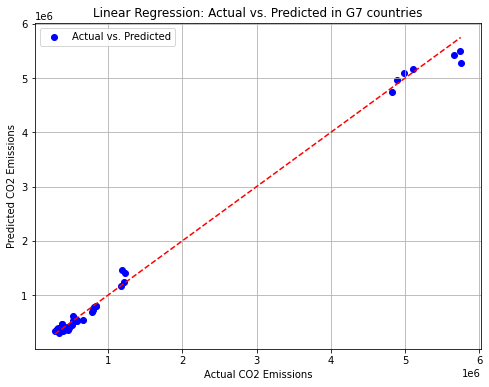

In [129]:
import numpy as np

# Make predictions on the testing data
predictions = lr_g7_model.transform(testing_g7_data)

# Extract actual and predicted values
y_actual = predictions.select("Value_co2_emissions_kt_by_country").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Linear Regression: Actual vs. Predicted in G7 countries')
plt.legend()
plt.grid(True)
plt.show()

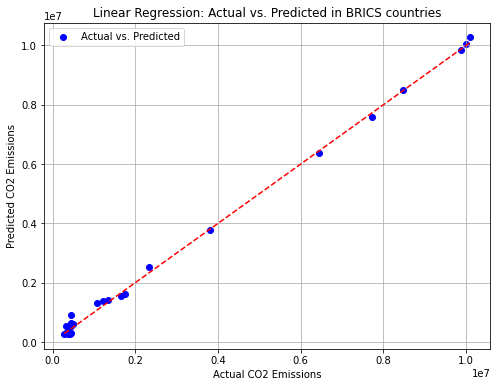

In [130]:
# Make predictions on the testing data
predictions = lr_brics_model.transform(testing_brics_data)

# Extract actual and predicted values
y_actual = predictions.select("Value_co2_emissions_kt_by_country").rdd.flatMap(lambda x: x).collect()
y_pred = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Linear Regression: Actual vs. Predicted in BRICS countries')
plt.legend()
plt.grid(True)
plt.show()